ASWATHI.G


DATA SCIENCE AND BUSSINESS ANALYTICS INTERN @THE SPARKS FOUNDATION-JUNE2021

TASK-6 Prediction suing Decision Tree Algorithm

Problem

Create the Decison Tree Classifier and Visualize it graphically.

The purpose is if we need any new data to this classifier,
it would be able to predict the right class accordingly.


In [92]:
#importing the required libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#load the data 
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [94]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [95]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [96]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [97]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [98]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [99]:
df.drop(["Id"],axis='columns',inplace=True)



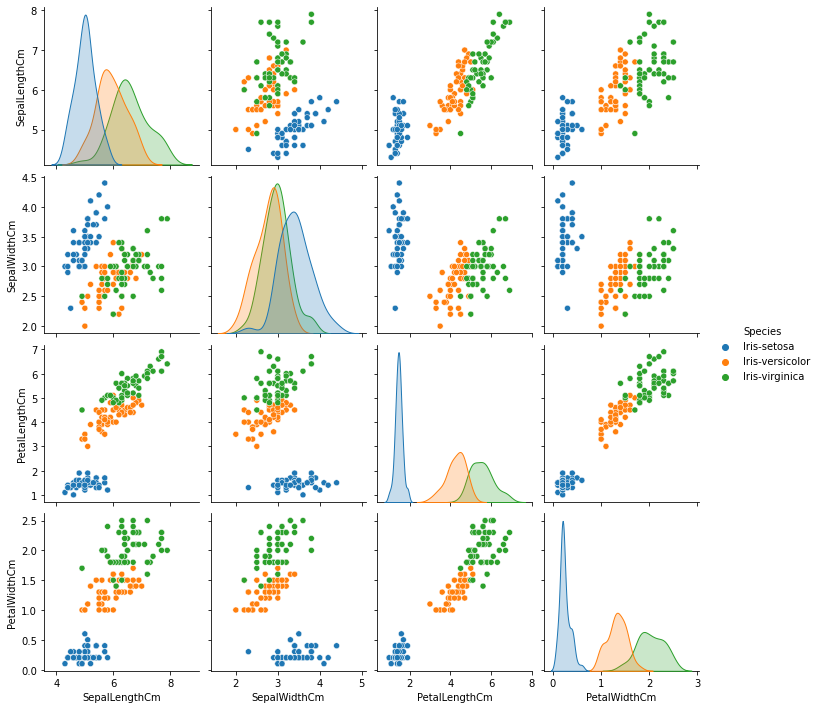

In [100]:
sns.pairplot(df,hue="Species")

In [101]:
#seperating features and labels
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values


In [102]:
#label encoding the output 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [103]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [104]:
#importinf Decision Tree Classifier  skleran library,training the model using training sets
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',random_state=None)
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
#Prediction for the test data
y_pred=classifier.predict(X_test)
y_pred=le.inverse_transform(y_pred)
y_test=le.inverse_transform(y_test)

In [106]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confiusion_Matrix is:  \n",cm)
ac=accuracy_score(y_test,y_pred)
print("Accuracy_Score is:  \n",ac)


Confiusion_Matrix is:  
 [[ 7  0  0]
 [ 0  8  3]
 [ 0  1 11]]
Accuracy_Score is:  
 0.8666666666666667


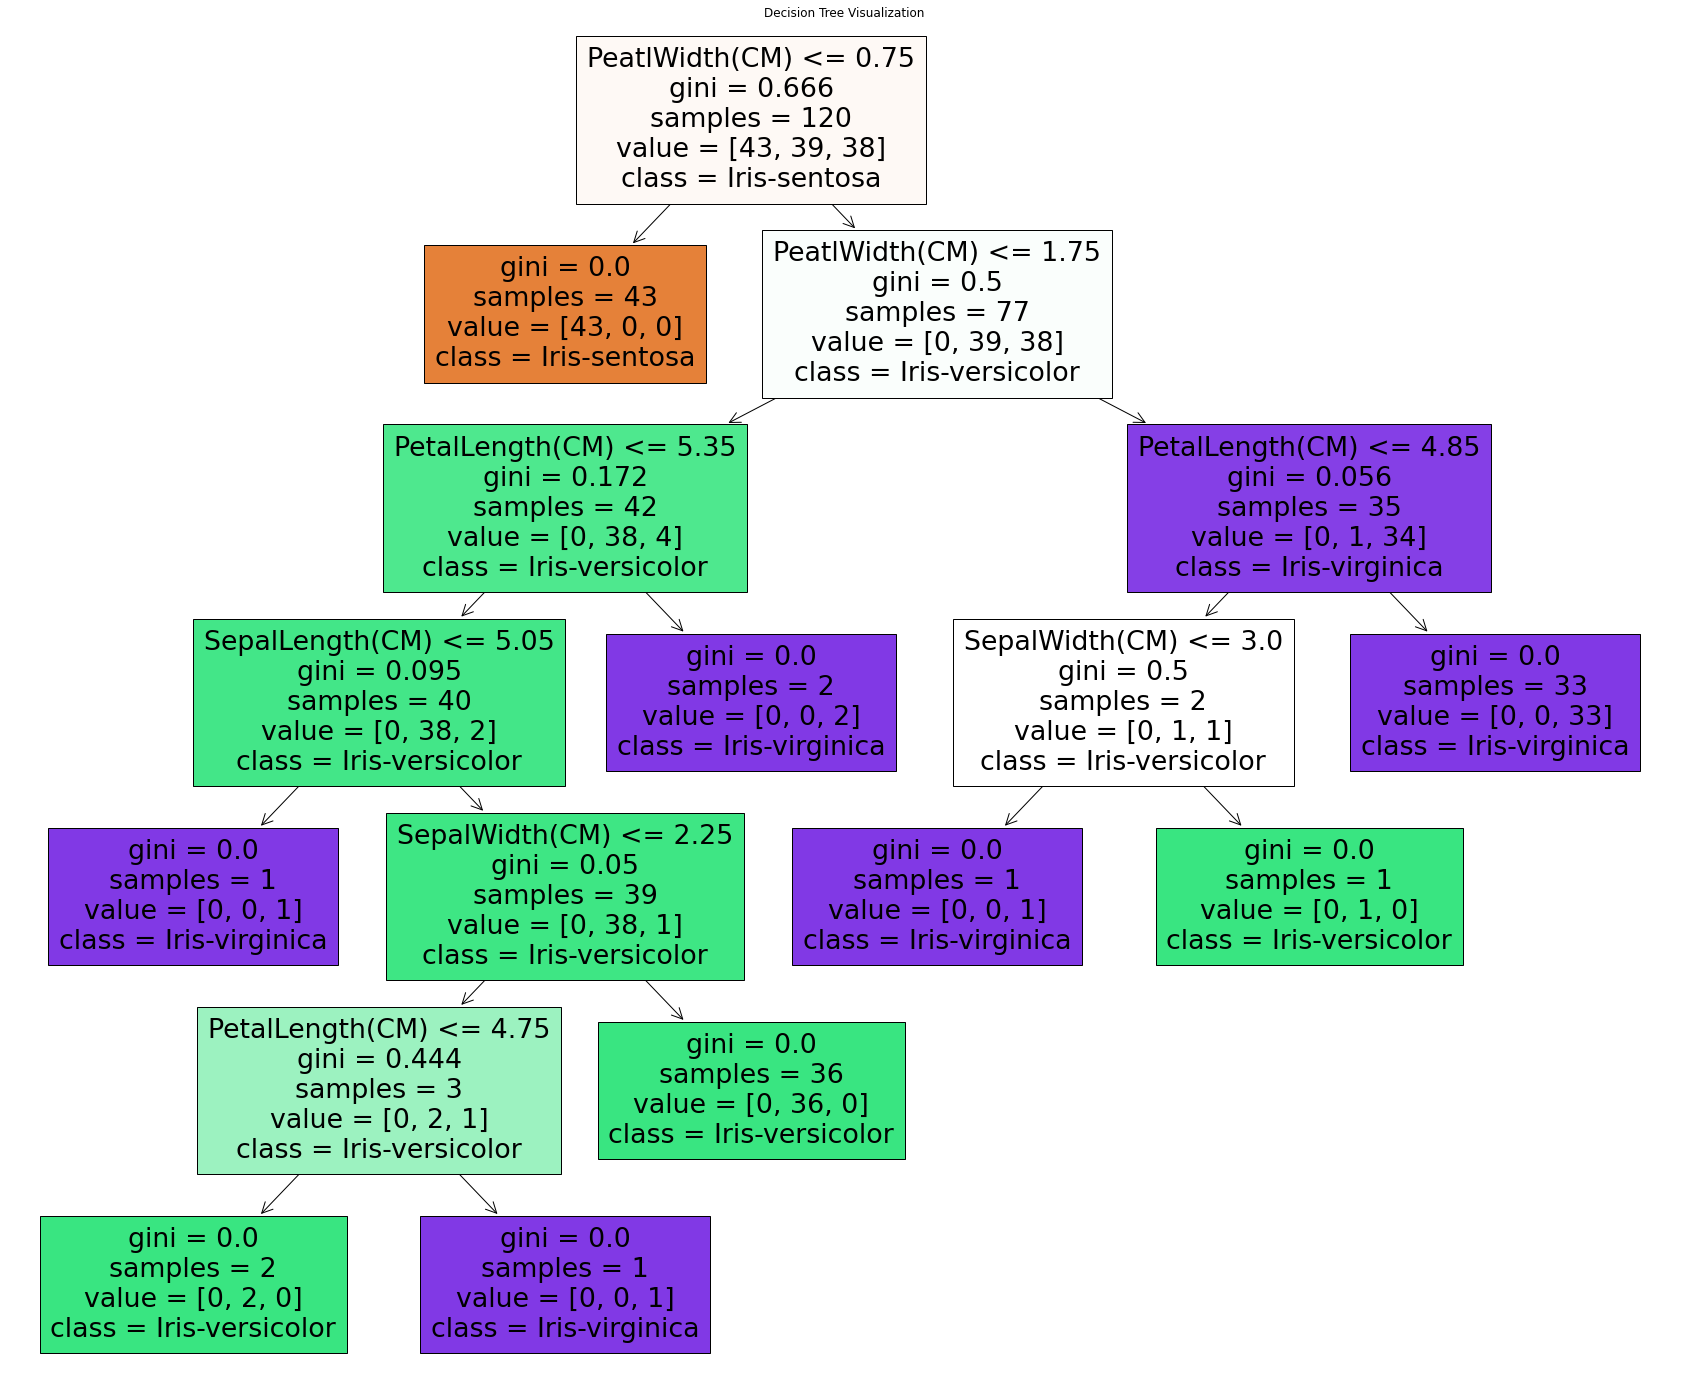

In [108]:
from sklearn  import tree 
plt.figure(figsize=(30,25))
dot_df=tree.plot_tree(classifier,feature_names=['SepalLength(CM)','SepalWidth(CM)','PetalLength(CM)','PeatlWidth(CM)'],class_names=['Iris-sentosa','Iris-versicolor','Iris-virginica'],filled=True)
plt.title("Decision Tree Visualization")
plt.show()
                                                 

# 

Done Task-6 
Thank You.